In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('bigdata.csv')

In [4]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5676,False,False,False,False,False,False,False,False,False,False,False
5677,False,False,False,False,False,False,False,False,False,False,False
5678,False,False,False,False,False,False,False,False,True,False,False
5679,False,False,False,False,False,False,False,False,True,False,False


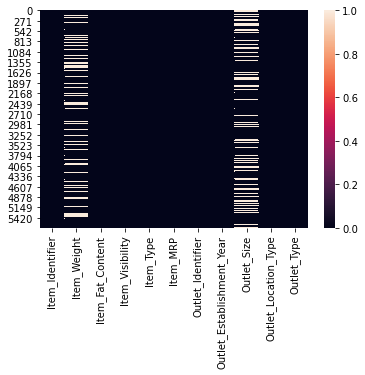

In [9]:
#Check null value
sns.heatmap(df.isnull())

In [10]:
#replace the missing with mean value
from sklearn.impute import SimpleImputer
imp1=SimpleImputer(strategy="mean")
df['Item_Weight']=imp1.fit_transform(df['Item_Weight'].values.reshape(-1,1))

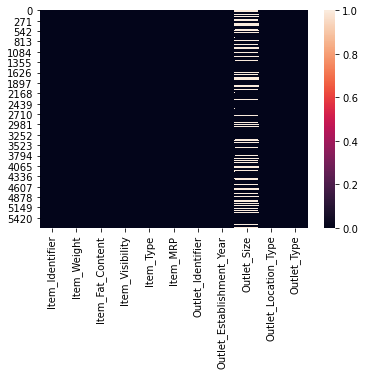

In [11]:
#Check null value
sns.heatmap(df.isnull())

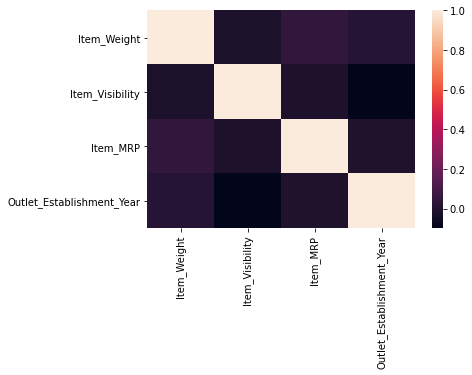

In [12]:
# correlation
dfcor=df.corr()
sns.heatmap(dfcor)

In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Item_Weight                     AxesSubplot(0.125,0.536818;0.110714x0.343182)
Item_Visibility              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Item_MRP                     AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.523571,0.536818;0.110714x0.343182)
dtype: object

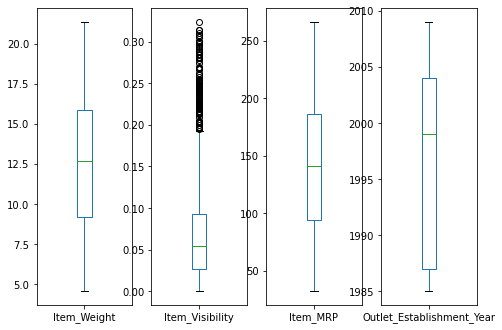

In [23]:
df1.plot(kind='box',subplots=True,layout=(2,6),figsize=(12,12))

In [20]:
df1=df.drop(["Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size","Outlet_Location_Type","Outlet_Type"],axis=1)

In [21]:
df1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750000,0.007565,107.8622,1999
1,8.300000,0.038428,87.3198,2007
2,14.600000,0.099575,241.7538,1998
3,7.315000,0.015388,155.0340,2007
4,12.695633,0.118599,234.2300,1985
...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997
5677,7.600000,0.142991,169.1448,2009
5678,10.000000,0.073529,118.7440,2002
5679,15.300000,0.000000,214.6218,2007


In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
threshold=3
print(np.where(z>3))
df_new=df1[(z<3).all(axis=1)]
df_new

(array([  46,   76,   78,   89,  138,  333,  385,  474,  543,  637,  858,
        871, 1046, 1191, 1256, 1270, 1411, 1516, 1547, 1577, 1616, 1710,
       1812, 1823, 1857, 1915, 1919, 2019, 2179, 2230, 2365, 2380, 2393,
       2504, 2516, 2561, 2605, 2609, 2625, 2628, 2677, 2779, 2836, 2843,
       3267, 3294, 3313, 3316, 3346, 3378, 3502, 3638, 3679, 3970, 4052,
       4147, 4159, 4208, 4255, 4328, 4365, 4421, 4575, 4616, 4689, 4801,
       4804, 4846, 4919, 4976, 4999, 5121, 5157, 5277, 5290, 5435, 5469,
       5482, 5514, 5571, 5668], dtype=int64), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750000,0.007565,107.8622,1999
1,8.300000,0.038428,87.3198,2007
2,14.600000,0.099575,241.7538,1998
3,7.315000,0.015388,155.0340,2007
4,12.695633,0.118599,234.2300,1985
...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997
5677,7.600000,0.142991,169.1448,2009
5678,10.000000,0.073529,118.7440,2002
5679,15.300000,0.000000,214.6218,2007


In [24]:
df_new.shape

(5600, 4)

In [26]:
df.skew()

Item_Weight                  0.142813
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

In [28]:
df['Item_Identifier'].count()

5681

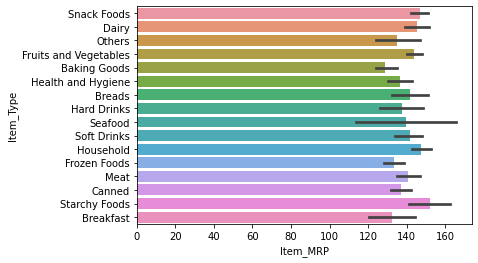

In [33]:
sns.barplot(x="Item_MRP",y="Item_Type",data=df)

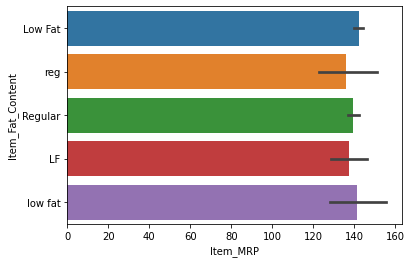

In [34]:
sns.barplot(x="Item_MRP",y="Item_Fat_Content",data=df)

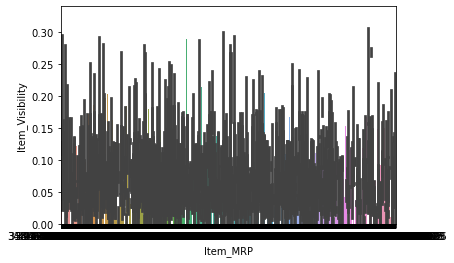

In [36]:
sns.barplot(x="Item_MRP",y="Item_Visibility",data=df)

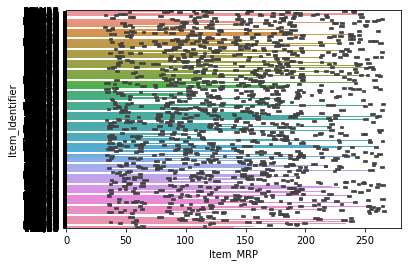

In [37]:
sns.barplot(x="Item_MRP",y="Item_Identifier",data=df)

In [51]:
df2=df1.drop(["Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size","Outlet_Location_Type","Outlet_Type"],axis=1)

In [56]:
x=df2.iloc[ :,:]
x

,Item_Weight,Item_Visibility,Outlet_Establishment_Year
0,20.750000,0.007565,1999
1,8.300000,0.038428,2007
2,14.600000,0.099575,1998
3,7.315000,0.015388,2007
4,12.695633,0.118599,1985
...,...,...,...
5676,10.500000,0.013496,1997
5677,7.600000,0.142991,2009
5678,10.000000,0.073529,2002
5679,15.300000,0.000000,2007


In [57]:
y=df.iloc[ :,5]
y

0       107.8622
1        87.3198
2       241.7538
3       155.0340
4       234.2300
          ...   
5676    141.3154
5677    169.1448
5678    118.7440
5679    214.6218
5680     79.7960
Name: Item_MRP, Length: 5681, dtype: float64

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [59]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [60]:
lm.coef_

array([ 7.05993719e-01,  8.56125316e+00, -7.42899128e-03])

In [61]:
lm.intercept_

146.1643830519725

In [62]:
lm.score(x_train,y_train)

0.0023389550070347376

In [63]:
pred=lm.predict(x_test)

In [64]:
print("predict result",pred)

predict result [145.14353024 140.76782653 138.16497271 ... 140.86987571 139.47006669
 136.03443912]


In [65]:
print("actual result",y_test)


actual result 1129    141.0496
932     150.2392
1780     51.9350
3765    196.2794
4963    108.9938
          ...   
5049    170.8422
3484     99.9358
495     124.8046
1405    150.0708
3873    138.6838
Name: Item_MRP, Length: 1705, dtype: float64


In [66]:
print('mean abs error',mean_absolute_error(y_test,pred))
print('mean square error',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

mean abs error 50.752169219611325
mean square error 3662.0280184973976
RMSE 60.51469258368085


In [67]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.0004062066429588729


In [68]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LinearRegression(),x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[ 0.00024945  0.0034215  -0.00114787  0.00206897  0.00191974]
0.0013023570898211378 0.0015856786936135436
